✅ CÉLULA 1 – Setup e Bibliotecas

#### 📚 BIBLIOTECAS PARA TREINAMENTO DE MODELO
#### Projeto: Dataflow Sentinel – Consumo por ML

In [ ]:
# =============================================================
# 📚 BIBLIOTECAS PARA TREINAMENTO DE MODELO
# Projeto: Dataflow Sentinel – Consumo por ML
# =============================================================

import pandas as pd
import numpy as np
import logging
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Logging
logging.basicConfig(level=logging.INFO,
                    format='[%(levelname)s] %(asctime)s - %(message)s',
                    datefmt='%H:%M:%S')
logger = logging.getLogger()


✅ CÉLULA 2 – Leitura dos dados transformados

#### 📁 LEITURA DO DATASET TRANSFORMADO (.parquet)

In [ ]:
# =============================================================
# 📁 LEITURA DO DATASET TRANSFORMADO (.parquet)
# =============================================================

parquet_path = "/content/dataflow_transformado.parquet"

if not os.path.exists(parquet_path):
    logger.error(f"❌ Arquivo Parquet não encontrado: {parquet_path}")
else:
    logger.info(f"📦 Arquivo localizado: {parquet_path}")

df = pd.read_parquet(parquet_path)
df.head()


,shipment_id,route_id,date,delay_minutes,cost_usd,temp_c,status,ano,mes,dia,dia_semana,fim_de_semana,atraso_critico,custo_categoria
0,SHP10000,RT02,1998-01-08,12,36.23,7.4,delivered,1998,1,8,Thursday,False,False,baixo
1,SHP10001,RT03,1998-01-09,8,37.28,4.4,failed,1998,1,9,Friday,False,False,baixo
2,SHP10002,RT04,1998-01-10,7,31.80,3.1,in_transit,1998,1,10,Saturday,True,False,baixo
3,SHP10003,RT04,1998-01-11,12,98.73,5.1,in_transit,1998,1,11,Sunday,True,False,alto
4,SHP10004,RT02,1998-01-12,10,69.52,0.8,delivered,1998,1,12,Monday,False,False,médio


✅ CÉLULA 3 – Seleção de features e target

#### 🧪 SELEÇÃO DE FEATURES E VARIÁVEL ALVO

In [ ]:
# =============================================================
# 🧪 SELEÇÃO DE FEATURES E VARIÁVEL ALVO
# =============================================================

# Convertendo a variável alvo para classificação
df['status'] = df['status'].astype('category')

# Selecionar features úteis
features = [
    'delay_minutes', 'cost_usd', 'temp_c',
    'ano', 'mes', 'fim_de_semana', 'atraso_critico'
]

X = df[features]
y = df['status']

logger.info(f"🎯 Target: status | Features: {features}")


✅ CÉLULA 4 – Divisão treino/teste + Treinamento

#### 🚂 TREINO E TESTE DO MODELO RANDOM FOREST

In [ ]:
# =============================================================
# 🚂 TREINO E TESTE DO MODELO RANDOM FOREST
# =============================================================

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinamento
model.fit(X_train, y_train)

logger.info("✅ Modelo treinado com sucesso.")
print("✅ Modelo treinado com RandomForestClassifier")
print(f"🔢 Quantidade de árvores: {model.n_estimators}")
print(f"📊 Features usadas: {X_train.columns.tolist()}")



✅ Modelo treinado com RandomForestClassifier
🔢 Quantidade de árvores: 100
📊 Features usadas: ['delay_minutes', 'cost_usd', 'temp_c', 'ano', 'mes', 'fim_de_semana', 'atraso_critico']


CÉLULA 4.1

🔎 Importância das Features

In [ ]:
def plot_feature_importance(model, feature_names):
    """
    Exibe gráfico de importância das features para modelos com .feature_importances_
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    feature_importances = pd.Series(model.feature_importances_, index=feature_names)
    feature_importances = feature_importances.sort_values(ascending=True)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title("🎯 Importância das Features")
    plt.xlabel("Importância")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()


<ipython-input-6-e8eec8d0b755>:16: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


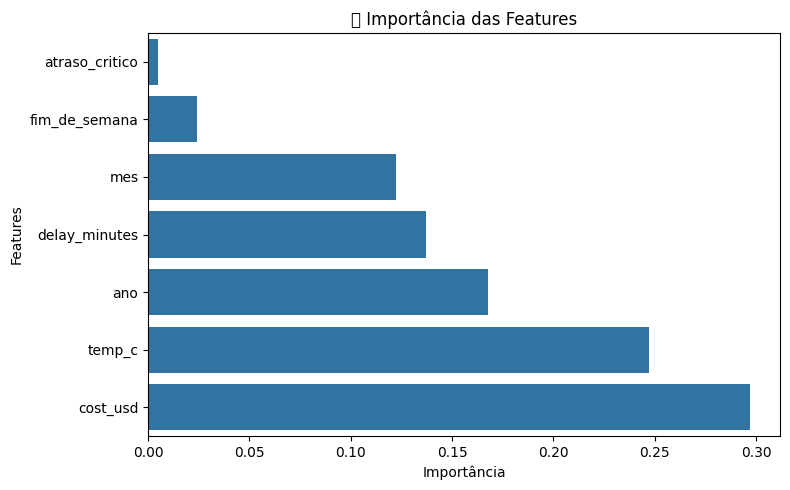

In [ ]:
plot_feature_importance(model, X.columns)


✅ CÉLULA 5 – Avaliação do Modelo

#### 📊 AVALIAÇÃO DO DESEMPENHO DO MODELO

In [ ]:
# =============================================================
# 📊 AVALIAÇÃO DO DESEMPENHO DO MODELO
# =============================================================

y_pred = model.predict(X_test)

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

print("📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🔍 Classification Report:
              precision    recall  f1-score   support

   delivered       0.70      0.98      0.82      1403
      failed       0.40      0.01      0.02       195
  in_transit       0.26      0.03      0.05       402

    accuracy                           0.69      2000
   macro avg       0.45      0.34      0.30      2000
weighted avg       0.58      0.69      0.59      2000

📉 Confusion Matrix:
[[1375    2   26]
 [ 187    2    6]
 [ 390    1   11]]


✅ CÉLULA FINAL – Exportação do modelo

#### 💾 EXPORTAR MODELO TREINADO (.pkl)

In [ ]:
# =============================================================
# 💾 EXPORTAR MODELO TREINADO (.pkl)
# =============================================================

model_path = "/content/dataflow_modelo_status.pkl"
joblib.dump(model, model_path)
logger.info(f"🧠 Modelo salvo em: {model_path}")


✅ Markdown Final

#### ✅ Etapa Concluída – Consumo de Dados por ML

Neste notebook, realizamos:
- Leitura dos dados transformados
- Seleção de variáveis relevantes para ML
- Treinamento de modelo leve (`RandomForestClassifier`)
- Avaliação com métricas interpretáveis
- Exportação do modelo treinado para reutilização

📤 Saída:
- `dataflow_modelo_status.pkl` – modelo pronto para inferência
